## <center>Eliminación de artefactos impulsivos en una imagen</center>
### **Nombres:**  Ponce Proaño Miguel Alejandro 
### **Asignatura:** Percepción Computacional
### **Actividad:** Nro. 1 - mia03_t5_tra

## Primera parte: Modelado del ruido impulsivo

### 1. Leer imagen

In [1]:
import skimage
from skimage.color import rgb2gray
img_astronauta_ori = skimage.data.astronaut()
img_astronauta_bn = rgb2gray(img_astronauta_ori)

### 2. Mostrar Imagen

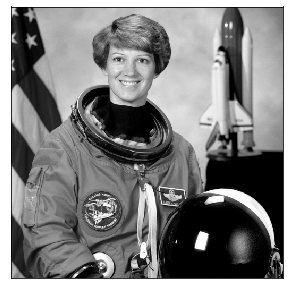

In [2]:
import matplotlib.pyplot as plt
def mostrar_imagen(imagen):
    fig,ax=plt.subplots(figsize=[5,5])
    ax.imshow(imagen,cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
mostrar_imagen(img_astronauta_bn)

### 3. Definir función para agregar ruido de forma aleatoria

In [3]:
import numpy as np
import random
def agregar_rudio_alterorio(imagen,porcentaje_rudio=0.05,detectar_max_min=False):  
    img_con_ruido = imagen.copy()
    if porcentaje_rudio<0 or porcentaje_rudio > 1 :
        raise ValueError("El porcentaje de rudio debe estar entre 0 y 1.")
    (nfilas, ncol) = img_con_ruido.shape
    mat_indices_aletorios=np.random.rand(nfilas,ncol)<porcentaje_rudio  
    minimo, maximo = crear_minimo_maximo(imagen,detectar_max_min)
    for i in range(nfilas):
        for j in range(ncol):            
            if mat_indices_aletorios[i,j]:                
                valor_pimienta_sal=random.randint(minimo, maximo)
                img_con_ruido[i,j]=valor_pimienta_sal
    return img_con_ruido
def crear_minimo_maximo(imagen,detectar_max_min):
    minimo=0
    maximo=1    
    if detectar_max_min:        
        minimo=int(np.min(imagen))
        maximo=int(np.max(imagen))
    return minimo,maximo

### 4. Agregar ruido y dibujar imagen resultado

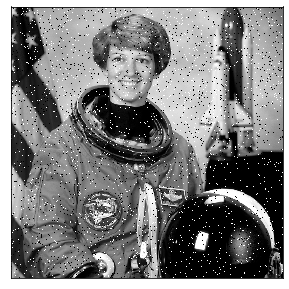

In [4]:
img_con_ruido_sal_pimienta=agregar_rudio_alterorio(img_astronauta_bn)
mostrar_imagen(img_con_ruido_sal_pimienta)

## Segunda Parte: Eliminación de artefactos impulsivos

### 1. Definir función crear ventana

In [5]:
def crear_ventana(imagen,dimension_ventana,indice_fila,indice_columna):
    (nfilas, ncol) = imagen.shape    
    ventana = np.zeros((dimension_ventana,dimension_ventana))    
    radio_ventana = int(dimension_ventana/2)           
    fila_min,fila_max = crear_indices_minimo_maximo(indice_fila,radio_ventana,nfilas)
    col_min,col_max = crear_indices_minimo_maximo(indice_columna,radio_ventana, ncol)
    ventana_imagen = imagen[fila_min:fila_max,col_min:col_max]
    (nfilas_ventana, ncol_ventana) = ventana_imagen.shape    
    for i in range(nfilas_ventana):
        for j in range(ncol_ventana):          
            ventana[i,j]=ventana_imagen[i,j]
    return ventana
def crear_indices_minimo_maximo(indice,radio,maximo):    
    indice_minimo = 0 if (indice-radio)<=0 else indice-radio
    indice_maximo = maximo if (indice+radio+1)>=maximo else indice+radio+1
    return indice_minimo,indice_maximo

### 2. Definir función eliminar ruido

In [6]:
def eliminar_artefactos_impulsivos(imagen,dimension_ventana=3):    
    img_sin_ruido = imagen.copy()
    (nfilas, ncol) = img_sin_ruido.shape
    if dimension_ventana>nfilas or dimension_ventana>ncol:
        raise ValueError("La ventana no puede ser mayor de la imagen")
    if dimension_ventana%2==0:
        dimension_ventana=dimension_ventana+1    
    for i in range(nfilas):
        for j in range(ncol):
            ventana_seleccionada = crear_ventana(imagen,dimension_ventana,i,j)
            mediana_ventana_seleccionada = np.median(ventana_seleccionada)
            img_sin_ruido[i,j] = mediana_ventana_seleccionada
    return img_sin_ruido

### 4. Eliminar ruido y dibujar imagen resultado

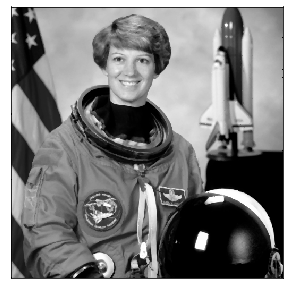

In [7]:
img_sin_ruido=eliminar_artefactos_impulsivos(img_con_ruido_sal_pimienta)
mostrar_imagen(img_sin_ruido)

## Tercera Parte: Detección de bordes en una imagen

### 1. Sobel - Definir función cálculo convolución

In [8]:
import numpy as np
import math
def generar_img_convolucion(imagen,mat_kernel):    
    (nfilas_imagen,ncol_imagen)=imagen.shape
    (nfilas_kernel,ncol_kernel)=mat_kernel.shape
    if nfilas_kernel>nfilas_imagen:
        raise ValueError("La matriz kernel no pueden ser mayor a la imagen.")
    if ncol_kernel>ncol_imagen:
        raise ValueError("La matriz kernel no pueden ser mayor a la imagen.")        
    dimesion_fila=int(nfilas_kernel/2)
    dimesion_columna=int(ncol_kernel/2)
    img_ceros=agrear_dimensiones_ceros(imagen,dimesion_fila,dimesion_columna)
    img_convolucion = np.zeros((nfilas_imagen,ncol_imagen))     
    k=0      
    for i in range(dimesion_fila,nfilas_imagen+dimesion_fila):
        l=0
        for j in range(dimesion_columna,ncol_imagen+dimesion_columna):
            fila_min=i-dimesion_fila
            fila_max=i+dimesion_fila+1
            col_min=j-dimesion_columna
            col_max=j+dimesion_columna+1
            sub_mat_imagen = img_ceros[fila_min:fila_max,col_min:col_max]
            mat_filtro_gussiano = mat_kernel.dot(sub_mat_imagen)
            suma = np.sum(mat_filtro_gussiano)
            img_convolucion[k,l]=suma
            l=l+1
        k=k+1        
    return img_convolucion                
def agrear_dimensiones_ceros(imagen,dimesion_fila,dimesion_columna):    
    (nfilas,ncol)=imagen.shape 
    total_filas=nfilas+2*dimesion_fila
    total_columnas=ncol+2*dimesion_columna
    img_ceros = np.zeros((total_filas,total_columnas))
    f_min=dimesion_fila
    f_max=nfilas+dimesion_fila
    col_min=dimesion_columna
    col_max=ncol+dimesion_columna
    img_ceros[f_min:f_max,col_min:col_max] = imagen[0:nfilas,0:ncol]
    return img_ceros

### 2. Definir función detección bordes Sobel

In [9]:
import numpy as np
def generar_img_sobel(imagen,
    mat_kernel_horizontal=np.array([[1, 2, 1], [0, 0, 0],[-1, -2, -1]]),
    mat_kernel_vertical=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])):
    mat_horizontal = generar_img_convolucion(imagen,mat_kernel_horizontal)
    mat_vertical = generar_img_convolucion(imagen,mat_kernel_vertical)
    img_gradiente = np.sqrt(pow(mat_horizontal,2)+pow(mat_vertical,2))    
    return img_gradiente

### 3. Aplicar función Sobel y dibujar imagen resultado

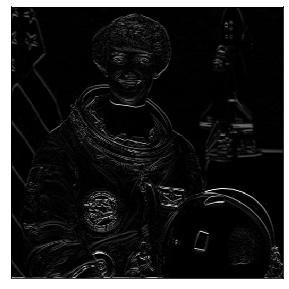

In [10]:
img_sobel = generar_img_sobel(img_astronauta_bn)
mostrar_imagen(img_sobel)

### 1. Canny  - Definir función kernel Gaussiano 

$ H(i,j)=\frac{1}{2\pi \sigma^{2}}*e^{\frac{-(i-(k+1))^{2}(j-(k+1))^{2}}{2 \sigma^{2}}} $ donde $1<=i,j<=k$

In [11]:
def crear_kernel_gaussiano(k=3, sigma=1):    
    dimesion = 2*k+1
    fila_k = np.linspace(-k, k, dimesion)
    x,y = np.meshgrid(fila_k,fila_k)
    factor_kernel=1/(2*math.pi*pow(sigma,2))
    mat_kernel = -1*(pow(x,2)+pow(y,2))/(2*pow(sigma,2))
    gussian_kernel = factor_kernel*np.exp(mat_kernel)
    return gussian_kernel

### 2. Definir función threshold

In [12]:
def generar_img_threshold(imagen, iteraciones=3):
    img_threshold = imagen.copy()
    valor_threshold_maximo=np.mean(imagen)    
    valor_threshold_mimino=valor_threshold_maximo    
    for i in range(iteraciones):
        valor_threshold_mimino=np.mean(imagen[imagen<=valor_threshold_mimino])
        valor_threshold_maximo=np.mean(imagen[imagen>valor_threshold_maximo])     
    img_threshold[imagen>valor_threshold_maximo] = valor_threshold_maximo
    img_threshold[imagen<=valor_threshold_mimino] = 0
    return img_threshold 

### 3. Aplicar algoritmo Canny y dibujar imagen resultado

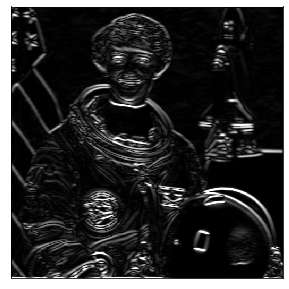

In [13]:
mat_gauss=crear_kernel_gaussiano(3,1)
img_convolucion_gaussiana = generar_img_convolucion(img_astronauta_bn,mat_gauss)
img_sobel_gradiente = generar_img_sobel(img_convolucion_gaussiana)
img_canny = generar_img_threshold(img_sobel_gradiente)
mostrar_imagen(img_canny)

### REFERENCIAS BIBLIOGRÁFICAS

<ul>
<li>Wikipedia contributors. Canny edge detector. Recuperado el 14 de Abril de 2020 de https://en.wikipedia.org/w/index.php?title=Canny_edge_detector&oldid=950845342</li>
<li>Wikipedia contributors. Image gradient. Recuperado el 16 de Abril de 2020 de https://en.wikipedia.org/w/index.php?title=Image_gradient&oldid=951384870</li>
<li>Colaboradores de Wikipedia. Núcleo (procesamiento digital de imágenes). Recuperado el 01 de Mayo de 2020 de https://es.wikipedia.org/w/index.php?title=N%C3%BAcleo_(procesamiento_digital_de_im%C3%A1genes)&oldid=12436987</li>
<li>Hank-Tsou. Computer-Vision-OpenCV-Python. Recuperado el 04 de Mayo de 2020 de  https://github.com/Hank-Tsou/Computer-Vision-OpenCV-Python/tree/master/tutorials/Image_Processing/2_Image_Thresholding</li>
<li>University of Auckland. (2010). Gaussian Filtering.  University of Auckland, New Zealand. Recuperada de https://www.cs.auckland.ac.nz/courses/compsci373s1c/PatricesLectures/Gaussian%20Filtering_1up.pdf</li>
</ul>




